# Stock-Forecasting

![](https://images.unsplash.com/photo-1468254095679-bbcba94a7066?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1049&q=80)

In this exercise, you will use a RNN to predict the stock market evolution.

Stock market can be seen as a sequence of values (each day is a step), and thus you can predict the closing value of the next day, knowing the past.

First, load the dataset `all_stocks_5yr.csv`, which contains all the stock market values over 5 years for many companies. Then explore it.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# TODO: Load the dataset and explore it
stocks = pd.read_csv('../input/all_stocks_5yr.csv', parse_dates=[0])

In [3]:
# TODO: Load the dataset and explore it
stocks

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


The column name represent the name of the stock, for example `'AAL'` stands for American Airlines.

Select a name for which you have many information (i.e. the more lines), and plot the `close` value of this stock as a function of time. This represents the stock market evolution.

In [4]:
# TODO: Plot the stock market evolution of a given name
stocks.Name.value_counts()

EL      1259
TROW    1259
SEE     1259
MRK     1259
PM      1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

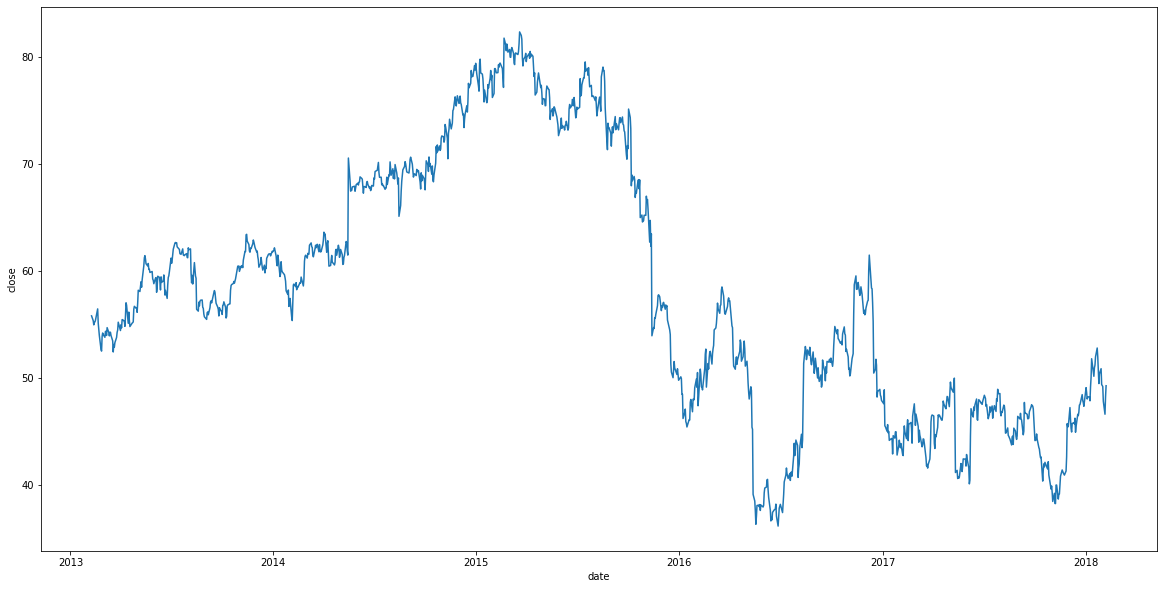

In [5]:
# TODO: Plot the stock market evolution of a given name
plt.figure(figsize=(20,10))
sns.lineplot(x='date', y='close', data=stocks[stocks.Name=='JWN'])
plt.show()

We will now try to make a prediction of this close value of a day, based on all the features (`open`, `high`, `low`, `close`, `volume`) of the 30 past days.

Before doing so, we need to create the (X, y) dataset!

Let's consider your action `Name` has 100 lines.

The `X` values should contain, in each line, a table of 30 days and 5 features (`open`, `high`, `low`, `close`, `volume`). So that the final `X` array will have the shape `(70, 30, 5)`.

This `y` values should be the `close` values of the days 31 to last (indeed, `y` can not contain the 30 first days, since we need 30 days of X to predict before). So the final `y` array will have the shape `(70, 1)` (or equivalently `(70,)`).

In [6]:
# TODO: compute X and y
stocks_JWN = stocks[stocks.Name == 'JWN']

In [7]:
len(stocks_JWN)

1259

In [8]:
lst = []
for i in range(0, len(stocks_JWN)-30):
    lst.append(stocks_JWN[['open', 'high', 'low', 'close', 'volume']][i:i+30].values)
X = np.array(lst)

In [9]:
lst = []
for i in range(30, len(stocks_JWN)):
    lst.append(stocks_JWN['close'].reset_index(drop=True)[i])
y=np.array(lst)

In [10]:
len(X)

1229

In [11]:
len(y)

1229

You already know the next step: prepare and split the data. Be careful, we want to keep the order in sequence...

In [12]:
# TODO: Prepare and split the data
X_train = X[:1000]
X_test = X[1000:]

In [13]:
y_train = y[:1000]
y_test = y[1000:]

Now that the data is ready, build a RNN model (for example begin with 2 layers of 16 units), compile it and train it.

In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_sc = scaler.fit_transform(X_train.reshape(-1, 5)).reshape(1000, 30, 5)
X_test_sc = scaler.transform(X_test.reshape(-1, 5)).reshape(229, 30, 5)

In [37]:
# TODO: Train your RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding


def my_RNN():

    model = Sequential()
    
    model.add(SimpleRNN(units=16, activation='relu', return_sequences=True))
    model.add(SimpleRNN(units=16, activation='relu', return_sequences=False))
    
    model.add(Dense(units=1, activation='linear'))

    return model

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(patience=100, restore_best_weights=True)]

In [39]:
model = my_RNN()

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=1000, batch_size=32, callbacks=callbacks)

Epoch 1/1000
32/32 [==============================] - 0s 15ms/step - loss: 3847.5308 - val_loss: 1837.2755
Epoch 2/1000
32/32 [==============================] - 0s 8ms/step - loss: 3450.4336 - val_loss: 2851.2083
Epoch 3/1000
32/32 [==============================] - 0s 9ms/step - loss: 1865.4413 - val_loss: 390.2937
Epoch 4/1000
32/32 [==============================] - 0s 9ms/step - loss: 329.8254 - val_loss: 918.8472
Epoch 5/1000
32/32 [==============================] - 0s 8ms/step - loss: 197.6264 - val_loss: 453.9314
Epoch 6/1000
32/32 [==============================] - 0s 8ms/step - loss: 131.5865 - val_loss: 373.3498
Epoch 7/1000
32/32 [==============================] - 0s 9ms/step - loss: 71.1860 - val_loss: 189.0521
Epoch 8/1000
32/32 [==============================] - 0s 9ms/step - loss: 42.3316 - val_loss: 140.3904
Epoch 9/1000
32/32 [==============================] - 0s 9ms/step - loss: 33.4255 - val_loss: 115.9803
Epoch 10/1000
32/32 [==============================] - 0s 8ms

Epoch 81/1000
32/32 [==============================] - 0s 9ms/step - loss: 5.3852 - val_loss: 11.0891
Epoch 82/1000
32/32 [==============================] - 0s 9ms/step - loss: 4.9551 - val_loss: 17.2800
Epoch 83/1000
32/32 [==============================] - 0s 8ms/step - loss: 5.2698 - val_loss: 19.1608
Epoch 84/1000
32/32 [==============================] - 0s 8ms/step - loss: 5.3931 - val_loss: 9.4227
Epoch 85/1000
32/32 [==============================] - 0s 9ms/step - loss: 5.5915 - val_loss: 8.7320
Epoch 86/1000
32/32 [==============================] - 0s 8ms/step - loss: 5.2740 - val_loss: 20.6474
Epoch 87/1000
32/32 [==============================] - 0s 8ms/step - loss: 4.9222 - val_loss: 9.2014
Epoch 88/1000
32/32 [==============================] - 0s 7ms/step - loss: 5.3666 - val_loss: 16.8871
Epoch 89/1000
32/32 [==============================] - 0s 8ms/step - loss: 4.9858 - val_loss: 10.4150
Epoch 90/1000
32/32 [==============================] - 0s 9ms/step - loss: 4.8817 - v

32/32 [==============================] - 0s 8ms/step - loss: 3.4348 - val_loss: 11.4704
Epoch 162/1000
32/32 [==============================] - 0s 8ms/step - loss: 3.6369 - val_loss: 7.2525
Epoch 163/1000
32/32 [==============================] - 0s 8ms/step - loss: 3.1704 - val_loss: 14.8972
Epoch 164/1000
32/32 [==============================] - 0s 8ms/step - loss: 3.0415 - val_loss: 11.4234
Epoch 165/1000
32/32 [==============================] - 0s 8ms/step - loss: 3.4980 - val_loss: 7.5589
Epoch 166/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.9551 - val_loss: 8.8202
Epoch 167/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.9453 - val_loss: 10.8462
Epoch 168/1000
32/32 [==============================] - 0s 8ms/step - loss: 3.1420 - val_loss: 8.1128
Epoch 169/1000
32/32 [==============================] - 0s 8ms/step - loss: 3.3523 - val_loss: 9.0640
Epoch 170/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.9356 - val_loss

32/32 [==============================] - 0s 8ms/step - loss: 2.6680 - val_loss: 5.4236
Epoch 242/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.1518 - val_loss: 11.4943
Epoch 243/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.1660 - val_loss: 7.0669
Epoch 244/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.4632 - val_loss: 7.0897
Epoch 245/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.7188 - val_loss: 5.3494
Epoch 246/1000
32/32 [==============================] - 0s 8ms/step - loss: 3.1012 - val_loss: 8.5197
Epoch 247/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.7004 - val_loss: 9.6525
Epoch 248/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.1695 - val_loss: 7.8134
Epoch 249/1000
32/32 [==============================] - 0s 9ms/step - loss: 2.4415 - val_loss: 7.8840
Epoch 250/1000
32/32 [==============================] - 0s 9ms/step - loss: 2.0775 - val_loss: 8

32/32 [==============================] - 0s 9ms/step - loss: 2.1736 - val_loss: 6.5218
Epoch 322/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.8518 - val_loss: 5.5012
Epoch 323/1000
32/32 [==============================] - 0s 10ms/step - loss: 1.8792 - val_loss: 4.3874
Epoch 324/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.7542 - val_loss: 4.3260
Epoch 325/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.7651 - val_loss: 6.6239
Epoch 326/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.8244 - val_loss: 12.0630
Epoch 327/1000
32/32 [==============================] - 0s 9ms/step - loss: 2.0215 - val_loss: 9.3391
Epoch 328/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.8099 - val_loss: 6.5899
Epoch 329/1000
32/32 [==============================] - 0s 8ms/step - loss: 2.1406 - val_loss: 3.7910
Epoch 330/1000
32/32 [==============================] - 0s 9ms/step - loss: 2.0972 - val_loss: 

32/32 [==============================] - 0s 8ms/step - loss: 1.7994 - val_loss: 4.8597
Epoch 402/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.7856 - val_loss: 3.3294
Epoch 403/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.7315 - val_loss: 6.5782
Epoch 404/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.5724 - val_loss: 4.8012
Epoch 405/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.5599 - val_loss: 6.5833
Epoch 406/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.6938 - val_loss: 8.4497
Epoch 407/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.7325 - val_loss: 6.3384
Epoch 408/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.5214 - val_loss: 3.3969
Epoch 409/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.5254 - val_loss: 5.5777
Epoch 410/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.6210 - val_loss: 3.

32/32 [==============================] - 0s 9ms/step - loss: 1.4243 - val_loss: 2.8698
Epoch 482/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.5782 - val_loss: 3.0502
Epoch 483/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.3273 - val_loss: 3.0135
Epoch 484/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.5258 - val_loss: 4.0985
Epoch 485/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.5476 - val_loss: 5.1598
Epoch 486/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.4660 - val_loss: 2.9623
Epoch 487/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.4579 - val_loss: 4.4153
Epoch 488/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.3017 - val_loss: 5.2918
Epoch 489/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.3330 - val_loss: 2.9222
Epoch 490/1000
32/32 [==============================] - 0s 9ms/step - loss: 1.7309 - val_loss: 8.

32/32 [==============================] - 0s 8ms/step - loss: 1.6082 - val_loss: 5.3057
Epoch 562/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.6918 - val_loss: 8.8295
Epoch 563/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.9010 - val_loss: 4.4970
Epoch 564/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.4852 - val_loss: 4.1430
Epoch 565/1000
32/32 [==============================] - 0s 7ms/step - loss: 1.4925 - val_loss: 4.3061
Epoch 566/1000
32/32 [==============================] - 0s 7ms/step - loss: 1.4636 - val_loss: 3.9089
Epoch 567/1000
32/32 [==============================] - 0s 7ms/step - loss: 1.4001 - val_loss: 4.3160
Epoch 568/1000
32/32 [==============================] - 0s 8ms/step - loss: 1.7707 - val_loss: 3.0185
Epoch 569/1000
32/32 [==============================] - 0s 7ms/step - loss: 1.5954 - val_loss: 5.4000
Epoch 570/1000
32/32 [==============================] - 0s 7ms/step - loss: 1.4019 - val_loss: 6.

Finally, plot the results: display on the same plot `y_train`, `y_test` and the prediction of `y_test`.

In [42]:
y_pred = model.predict(X_test_sc)

<IPython.core.display.Javascript object>


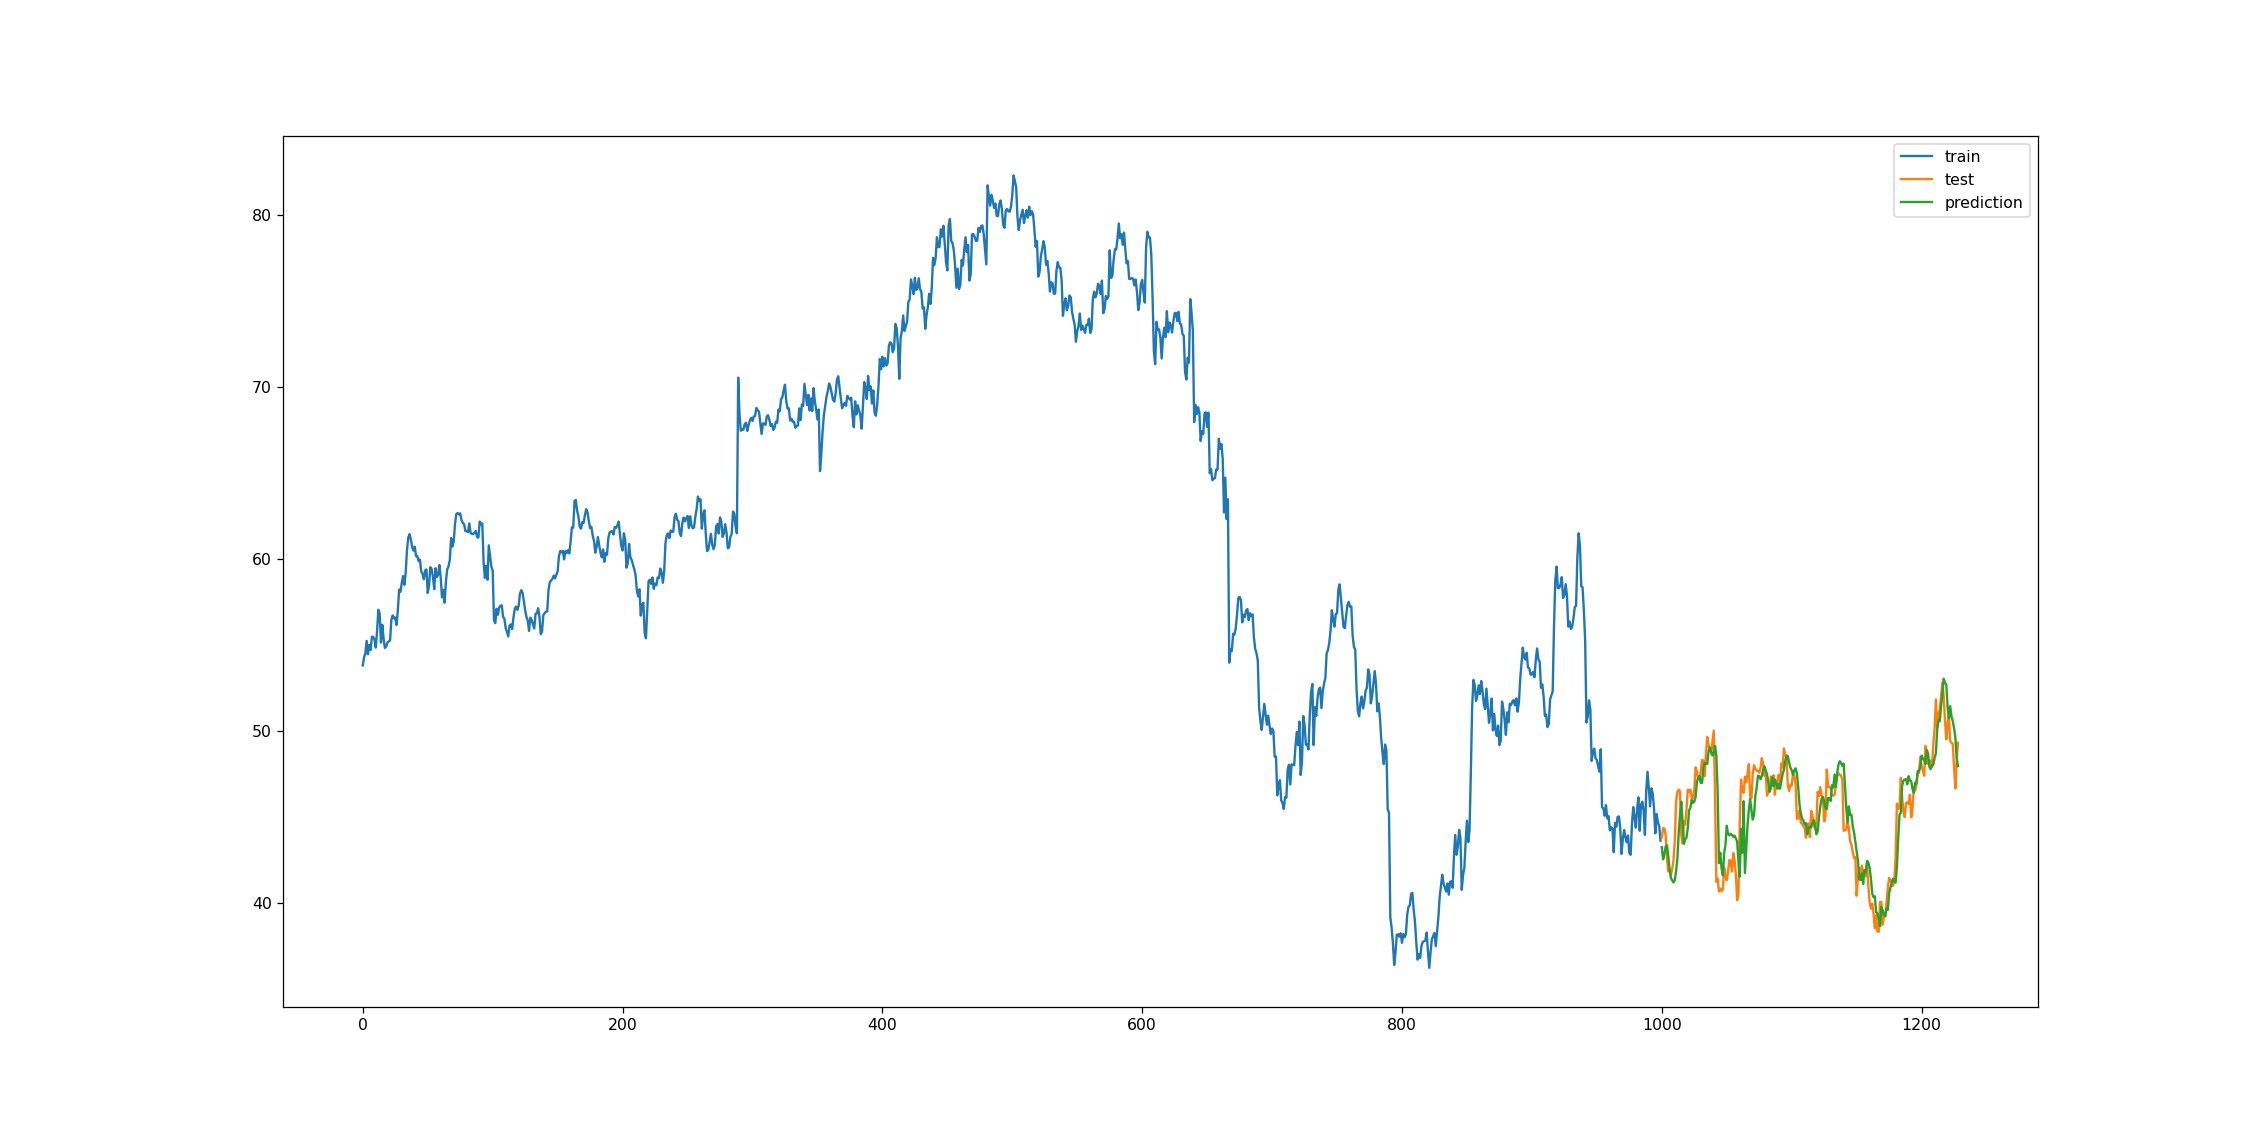

In [43]:
# TODO: Plot the results
%matplotlib notebook
plt.figure(figsize=(20,10))
plt.plot(np.arange(1000), y_train, label='train')
plt.plot(np.arange(1000, 1229), y_test, label='test')
plt.plot(np.arange(1000, 1229), y_pred, label='prediction')
plt.legend()
plt.show()

You can try to improve your model by adding as features the information of other actions. As you know, in stock market, most of the information that impacts it is out of the stock market information itself.